<center>


<img src="https://habrastorage.org/webt/jq/gc/r5/jqgcr5azmatev6zvgufn8xftehy.png">
    
#  **II Escuela de Verano en Física Computacional**

Este material está sujeto a los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso gratuito para cualquier propósito no comercial.

*También puede consultar la última versión de este notebook en nuestro [repositorio](https://github.com/PCPUNMSM) y los videos de clase [en nuestro canal de Youtube](https://www.youtube.com/channel/UCze8vzQLcplutz0nWDNjFCA).*
    

# <center> Lista de Ejercicios



Autor del trabajo: Sandra Judith González Enríquez

Correo de registro: gonzalezes2018@licifug.ugto.mx


## **Problema 1:  Raíces de ecuaciones**



<p align="center">
  <img src="https://habrastorage.org/webt/x6/5e/j3/x65ej3pwjn51joueohr3gckbfyy.png"  width=50% />
</p>

Considere la ecuación de movimiento de Kepler:

$$M=E-e sen(E)$$
 
Donde:

* $M$: anomalía media.
* $E$: anomalía excéntrica de una órbita elíptica .
* $e$: Excentricidad. 

Para encontrar $E$, necesitamos resolver la ecuación no lineal:

$$f(E) = M + e sen E − E = 0$$

Dado $e = 0.0167$ (excentricidad de la Tierra), $a=1$UA (Distancia de la tierra al sol) y $M = 1$ (en radianes)

**a)** Defina y utilice 3 métodos para calcular $E$ elegir aproximaciones iniciales apropiadas o un intervalo que contenga la raíz (requerido para el método de bisección), grafique la función $f (E)$ y luego determine gráficamente dónde cruza el eje $E$.

**b)** Calcule E, (haciendo $f(E)=0$ para distintos valores de $M$) , donde $t_0=0, t=100$ días (P es constante), elija esos valores de $E$, grafique $E(t), x(t), y(t)$, detalle su análisis.

Sabiendo que:

$$x=a.cos(E-e)$$

$$y=a\sqrt{1-e^2}sen(E)$$

$$M=\frac{2\pi (t-t_0)}{P}$$

donde:

t: tiempo en días

P: Periodo

Conocemos de la **tercera ley de Kepler**:

$$P=\frac{2\pi a^{3/2}}{(G(M_\star+m))^{1/2}}$$

$a,G,M_\star,m$ son la distancia de la tierra al sol, la constante de gravitación universal, la masa del sol y la masa de la tierra




### (A)

In [ ]:
## Introduce tu respuesta aquí
import numpy as np
import matplotlib.pyplot as plt

## CONSTANTES
e = 0.0167      #excentricidad de la Tierra
M = 1           #anomalía media en radianes
tol = 1.0e-8    #tolerancia (para met. bisección)
xi = 0          #limite inferior para biseccion
xf = 1          #limite superior para biseccion
c = 50          #valor de inicio para Newton
n = 0           #limite inferior para secante
m = 10          #limite superior para secante
## FUNCIÓN
def f(E):
  return (M + e*np.sin(E) - E)
def df(E):
  return (e*np.cos(E)-1)

## 1. MÉTODO DE BISECCIÓN
def biseccion(f,xi,xf,tol):
  x = (xi + xf) / 2
  i = 1
  while xf - xi > tol: #la condición indica que el ciclo seguirá hasta que el 
                       #"error" sea menor a la tolerancia
    if np.sign(f(xi))*np.sign(f(x)) > 0:
      i += 1
      xi = x
    else:
      i += 1
      xf = x
    x = (xi + xf) / 2
    return (x,i)

## 2. MÉTODO DE NEWTON
def newton(f,df,c,tol):
  error = 1 #se pone arbitrariamente en 1
  i = 1
  while error > tol:
    y = c - (f(c))/(df(c))
    error = abs((y-c)/y) #error en método de Newton
    c = y
    i += 1
  return (y,i)

## 3. MÉTODO DE LA SECANTE
def secante(f,m,n,tol):
  error = 1
  i = 1
  while error > tol: 
    z = n - f(n)*((m-n)/(f(m)-f(n)))
    error = abs((z-n)/z) #error en método de secante
    m = n
    n = z
    i += 1
  return (z,i)

In [ ]:
## Aquí se ejecutan los 3 métodos para la función f(E)
rb = biseccion(f,xi,xf,tol)[0]
iteracionb = biseccion(f,xi,xf,tol)[1]
biseccion(f,xi,xf,tol)

rn = newton(f,df,c,tol)[0]
iteracionn = newton(f,df,c,tol)[1]
newton(f,df,c,tol)

rs = secante(f,m,n,tol)[0]
iteracions = secante(f,m,n,tol)[1] 
secante(f,m,n,tol)

print("Método \t\t Raíz \t\t\t # iteraciones")
print("Bisección \t",rb,"\t\t\t\t",iteracionb)
print("Newton \t\t",rn,"\t\t",iteracionn)
print("Secante \t",rs,"\t\t",iteracions)

Método 		 Raíz 			 # iteraciones
Bisección 	 0.75 				 2
Newton 		 1.0141790871647136 		 6
Secante 	 1.014179087164709 		 5


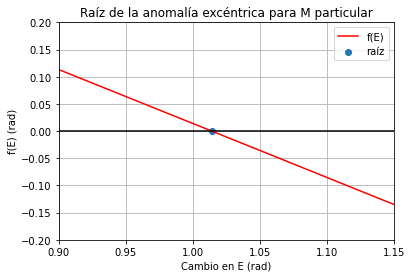

In [ ]:
## GRÁFICO
plt.xlim(0.9,1.15)
plt.ylim(-0.2,0.2)
x1 = np.linspace(0, 1.2,num=10)
y1 = f(x1)

plt.plot(x1,y1,label='f(E)',color='r')
plt.scatter(rs,0, label='raíz') # PUNTO RAIZ con el método de la secante
plt.axhline(0, color='k')  # EJE X
#plt.axvline(0, color='k')  # EJE Y
plt.title("Raíz de la anomalía excéntrica para M particular")
plt.xlabel("Cambio en E (rad)")
plt.ylabel("f(E) (rad)")
plt.legend() 
plt.grid()

#Del gráfico, podríamos decir que la raíz es 1.02 aproximadamente. Por el resultado
#del método, notemos que efectivamente con el método de Newton y la secante se 
#obtiene una raíz exacta de la función f(E) en el punto (1.01417,0) 

### (B)
Para este inciso se considerará que M cambia en función del tiempo, por lo que habrán 100 datos del tiempo (100 días).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in double_scalars


Valor de E en el día 100:  1.7368625793227352


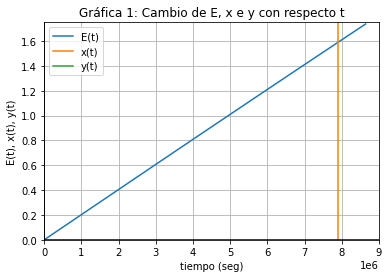

In [ ]:
## CONSTANTES
a = 1.496e+11   #distancia de la tierra al Sol en metros (1 UA = 1.496e+8)
MS = 1.989e+30  #masa del sol en kg
m = 5.972e+24   #masa de la tierra en kg
G = 6.674e-11   #constante de gravitación universal (N*m^2/kg^2)
P = (2*np.pi*((np.sqrt(a))**3)) / (np.sqrt(G*(MS+m)))  #Periodo (cte)
t0 = 0          #tiempo inicial
t = 8.64e6      #equivalencia de 100 días en segundos, para respetar las unidades de G
tiempo = np.linspace(t0,t,100)
Maux = []

## FUNCIONES
def anomaliam(t):              #se define la ecuación para M
  return ((2*np.pi*(t - t0)) / P)    
for t in (tiempo):             #se genera una lista con los valores de M
  Maux.append(anomaliam(t))       
def pax(E):                    #genera función para x
  return (a*np.cos(E-e))      
def pay(E):                    #genera función para y
  return (a*np.sqrt(1-e**2)*np.sin(E))

#Debido a que no hay forma analítica de calcular E, se usará el método de la 
#secante para obtener los valores de E coforme M cambia en el tiempo. Además, 
#se usará el mismo valor de la excentricidad pues no se cambiará la elipse 
#(relación de las distancias entre los focos y el sol, junto con los ejes), sino
#que se encontrará el comportamiento del movimiento de la Tierra conforme pasa 
#el tiempo (que se observa con el cambio de M y E en el tiempo).

raizt = []             #Este arreglo guardará las raíces para cada función(E,M)
valpax = []            #Este arreglo guardará los valores de la función pax(E)
valpay = []            #Este arreglo guardará los valores de la función pay(E)
for i in range(len(Maux)):     #Se calculan las raíces de E para cada valor de M
  M = Maux[i]
  raizt.append(secante(f,m,n,tol)[0])
for i in (raizt):      #Función para calcular pax(E) y pay(E)
  valpax.append(pax(i))
  valpay.append(pay(i))

print("Valor de E en el día 100: ", raizt[99])
## GRÁFICO
plt.xlim(0,9e+6)
plt.ylim(0,1.75)
x1 = tiempo
y1 = raizt
plt.plot(x1,y1,label='E(t)')
plt.plot(x1,valpax,label='x(t)')
plt.plot(x1,valpay,label='y(t)')

plt.axhline(0, color='k')  # EJE X
plt.axvline(0, color='k')  # EJE Y
plt.title("Gráfica 1: Cambio de E, x e y con respecto t")
plt.xlabel("tiempo (seg)")
plt.ylabel("E(t), x(t), y(t)")
plt.legend() 
plt.grid()

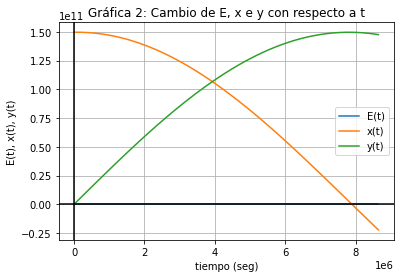

In [ ]:
## GRÁFICO 2
x1 = tiempo
y1 = raizt
plt.plot(x1,y1,label='E(t)')
plt.plot(x1,valpax,label='x(t)')
plt.plot(x1,valpay,label='y(t)')

plt.axhline(0, color='k')  # EJE X
plt.axvline(0, color='k')  # EJE Y
plt.title("Gráfica 2: Cambio de E, x e y con respecto a t")
plt.xlabel("tiempo (seg)")
plt.ylabel("E(t), x(t), y(t)")
plt.legend() 
plt.grid()

En la **gráfica 1** se puede observar cómo es que cambia la anomalía excéntrica a lo largo de 100 días. Corroborando el comportamiento físico (+), la anomalía excéntrica es el ángulo en radianes formado al trazar una perpendicular que pase por un punto que se mueve en la elipse y otro que se mueve en un círculo con el mismo radio que el semieje mayor del elipse. Es por ello que tiene sentido que, si la Tierra se desplaza desde el ángulo 0 (correpondiente a estar perpendicular en el perihelio o punto más cercano de la Tierra al Sol), donde tendría una M = 0 y E = 0; y al comenzar a avanzar, aumentaría M y al mismo tiempo E. Ya que M y E son ángulos (rad), llegarán a 360 grados (6.28319) antes de volver a empezar, por lo que al pasar el tiempo, estas variables tendrán un comportamiento ascendente.  
Del valor obtenido para E al día 100 (E = 1.7368625793227352 rad = 99.5148953 grados), la Tierra habrá soprepasado poco más de $\pi/2$ de una circunferencia.

Por otro lado, las funciones de x(t) y y(t) tienen valores muy grandes (pues consideran variables de órdenes de magnitud grandes, por las distancias de la Tierra al Sol y sus masas), por lo que no se pueden ver en la **gráfica 1**, pero se presenta su comportamiento en la **gráfica 2**. Decaen al pasar el tiempo ya que son las coordenadas de la elipse: cuando 'x' decrece, 'y' crece.

(+) Para conocer más, revisar: https://youtu.be/obRLUC_o_HQ

## **Problema 2: Interpolación**

Dadas las funciones:

1. $f (x) = sin(x^2) $

2. $f (x) = e^{sin (x)}$

3. $f (x) = \frac{0.2}{(x-3.2)^2 + 0.04}$

**a)** Estudiar el error en dos métodos de interpolación (de su elección) con 10,20 y 50 datos (uniformemente distribuidos) en el intervalo [0.0, 5.0] y compare los resultados.

**b)** Hallar los órdenes de convergencia, elabore su gráfico con el eje x en base 2 y detallar su análisis.

**c)** Añade una perturbación sinusoidal ($\delta g(x)=sin(x)$) del orden de $10^{-4},10^{-5}, 10^{-6}$ con distribución homogénea, grafice y detalle su análisis, ¿cuál es el error que generan con respecto a aproximación hecha en "2.a)"?

### (A)

In [ ]:
## Introduce tu respuesta aquí
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt   

## FUNCIONES
def f1(x):                        #Función 1
  return (np.sin(x**2))
def f2(x):                        #Función 2
  return (np.exp(np.sin(x)))
def f3(x):                        #Función 3
  return (0.2/((x-3.2)**2+0.04))

a = 0.0   #Intervalo [a,b] 
b = 5.0

## INTERPOLACIÓN DE LAGRANGE
def lagrange(xL,yL):
  n = len(xL)
  x = sym.Symbol('x') #variable simbólica
  poli = 0
  for i in range(n):
    numerador = 1
    denominador = 1
    for j  in range(n):
      if (j!=i):
        numerador = numerador*(x-xL[j])
        denominador = denominador*(xL[i]-xL[j])
    poli = poli + (numerador/denominador)*yL[i]
  polisimple = sym.expand(poli) #para la expresión simple del polinomio
  px = sym.lambdify(x,poli)     #para evaluación numérica
  return px
#No se mandarán los resultados de los polinomios (polisimple) pues serían 
#expresiones con demasiados términos

## INTERPOLACIÓN DE NEWTON
# Método de diferencias divididas (para los coeficientes)
def dif_div(x,y):
  n = len(y)
  coef = np.zeros([n, n])   #Matriz de 0s
  coef[:,0] = y             #La primer columna serán los valores de y
  for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
  return coef

def interp_newton(xL,yL):
    n = len(xL) - 1 
    coef = dif_div(xL,yL)[0, :]
    x=sym.Symbol('x')
    poli = coef[n]
    for k in range(1,n+1):
        poli = coef[n-k] + (x -xL[n-k])*poli
    px = sym.lambdify(x,poli)
    return px

In [ ]:
## GENERACIÓN DE POLINOMIOS
pollagrange = [] #Aquí se guardarán las coordenadas de los polinomios generados
#en cada función (f1,f2,f3) como un arreglo
polnewton = []
for xL in [np.linspace(a,b,10),np.linspace(a,b,20),np.linspace(a,b,50)]:
  for yL in [f1(xL), f2(xL), f3(xL)]:
    pollagrange.append(lagrange(xL,yL))
    polnewton.append(interp_newton(xL,yL))

Para los gráficos, una vez que se han generado las funciones o polinomios por el método de Lagrange o Newton, conviene graficar esas funciones con más puntos para que sean más "suaves" visualmente. Es por eso que se tomó otra cantidad de datos en x (en lugar de 10, 20 o 50), se seleccionó 200, donde la función seno se veía un poco más definida.

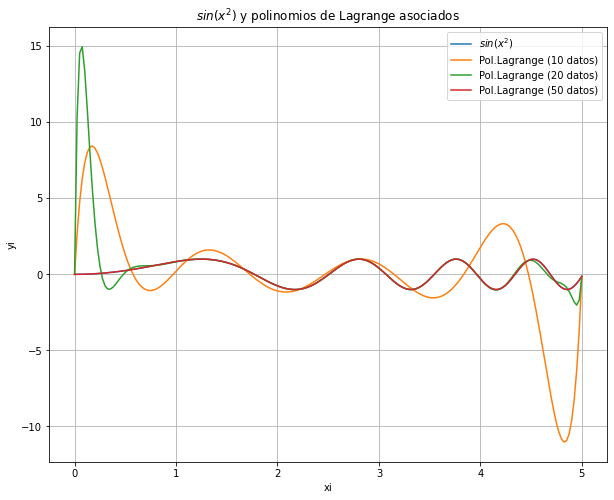

In [ ]:
## GRÁFICO PARA f1(x)=sin(x^2) con interpolación de Lagrange
inter = np.linspace(a,b,200)
fig = plt.figure(figsize = (10,8)) #agrandar la figura
plt.plot(inter,f1(inter),label='$sin(x^2)$')
plt.plot(inter,pollagrange[0](inter),label='Pol.Lagrange (10 datos)')
plt.plot(inter,pollagrange[3](inter),label='Pol.Lagrange (20 datos)')
plt.plot(inter,pollagrange[6](inter),label='Pol.Lagrange (50 datos)')
plt.title("$sin(x^2)$ y polinomios de Lagrange asociados")
plt.xlabel("xi")
plt.ylabel("yi")
plt.legend() 
plt.grid()

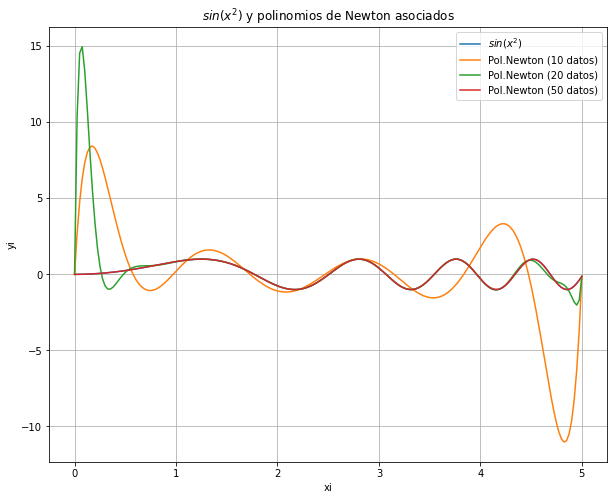

In [ ]:
## GRÁFICO PARA f1(x)=sin(x^2) con interpolación de Newton
fig = plt.figure(figsize = (10,8)) #agrandar la figura
plt.plot(inter,f1(inter),label='$sin(x^2)$')
plt.plot(inter,polnewton[0](inter),label='Pol.Newton (10 datos)')
plt.plot(inter,polnewton[3](inter),label='Pol.Newton (20 datos)')
plt.plot(inter,polnewton[6](inter),label='Pol.Newton (50 datos)')
plt.title("$sin(x^2)$ y polinomios de Newton asociados")
plt.xlabel("xi")
plt.ylabel("yi")
plt.legend() 
plt.grid()

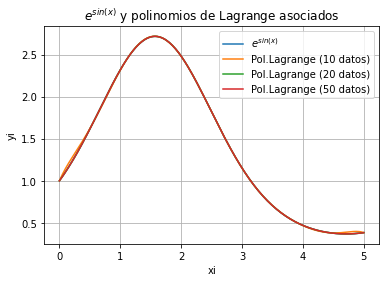

In [ ]:
## GRÁFICO PARA f2(x)=exp[sin(x)] con interpolación de Lagrange
#fig = plt.figure(figsize = (10,8)) #agrandar la figura
plt.plot(inter,f2(inter),label='$e^{sin(x)}$')
plt.plot(inter,pollagrange[1](inter),label='Pol.Lagrange (10 datos)')
plt.plot(inter,pollagrange[4](inter),label='Pol.Lagrange (20 datos)')
plt.plot(inter,pollagrange[7](inter),label='Pol.Lagrange (50 datos)')
plt.title("$e^{sin(x)}$ y polinomios de Lagrange asociados")
plt.xlabel("xi")
plt.ylabel("yi")
plt.legend() 
plt.grid()

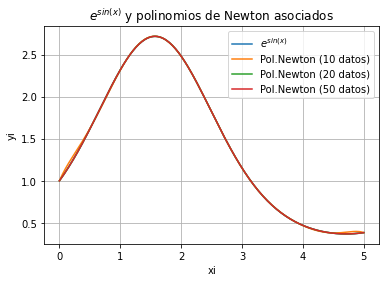

In [ ]:
## GRÁFICO PARA f2(x)=exp[sin(x)] con interpolación de Newton
#fig = plt.figure(figsize = (10,8)) #agrandar la figura
plt.plot(inter,f2(inter),label='$e^{sin(x)}$')
plt.plot(inter,polnewton[1](inter),label='Pol.Newton (10 datos)')
plt.plot(inter,polnewton[4](inter),label='Pol.Newton (20 datos)')
plt.plot(inter,polnewton[7](inter),label='Pol.Newton (50 datos)')
plt.title("$e^{sin(x)}$ y polinomios de Newton asociados")
plt.xlabel("xi")
plt.ylabel("yi")
plt.legend() 
plt.grid()

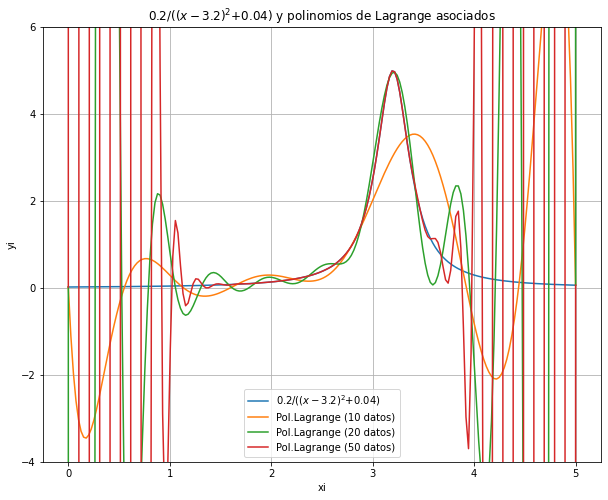

In [ ]:
## GRÁFICO PARA f3(x)=0.2/((x-3.2)^2+0.04) con interpolación de Lagrange
fig = plt.figure(figsize = (10,8)) #agrandar la figura
plt.ylim(-4,6) #Aquí es necesario aplicarle un límite al eje y, pues la función 
               #con 50 datos se extiende hasta aprox. 4e9 en el eje y+
               #Se puede observar que mientras mayor cantidad de datos, las 
               #gráficas de los polinomios se vuelven mas "caóticas" 
plt.plot(inter,f3(inter),label='0.2/($(x-3.2)^2$+0.04)')
plt.plot(inter,pollagrange[2](inter),label='Pol.Lagrange (10 datos)')
plt.plot(inter,pollagrange[5](inter),label='Pol.Lagrange (20 datos)')
plt.plot(inter,pollagrange[8](inter),label='Pol.Lagrange (50 datos)')
plt.title("0.2/($(x-3.2)^2$+0.04) y polinomios de Lagrange asociados")
plt.xlabel("xi")
plt.ylabel("yi")
plt.legend() 
plt.grid()

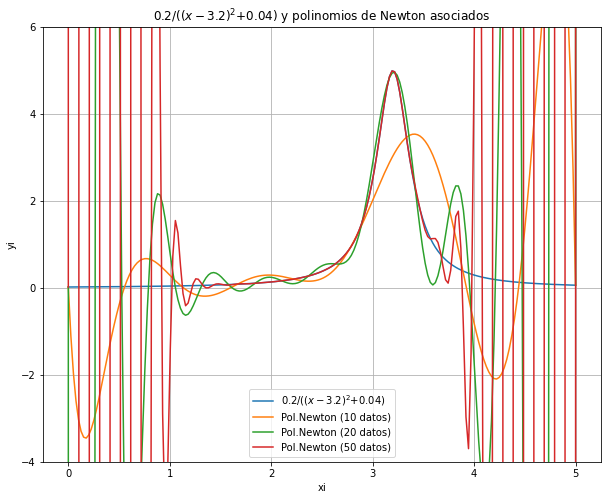

In [ ]:
## GRÁFICO PARA f3(x)=0.2/((x-3.2)^2+0.04) con interpolación de Newton
fig = plt.figure(figsize = (10,8)) #agrandar la figura
plt.ylim(-4,6) #Es necesario aplicarle un límite al eje y, pues la función 
               #con 50 datos se extiende hasta aprox. 4e9 en el eje y+
               #Se puede observar que mientras mayor cantidad de datos, las 
               #gráficas de los polinomios se vuelven mas "caóticas" 
plt.plot(inter,f3(inter),label='0.2/($(x-3.2)^2$+0.04)')
plt.plot(inter,polnewton[2](inter),label='Pol.Newton (10 datos)')
plt.plot(inter,polnewton[5](inter),label='Pol.Newton (20 datos)')
plt.plot(inter,polnewton[8](inter),label='Pol.Newton (50 datos)')
plt.title("0.2/($(x-3.2)^2$+0.04) y polinomios de Newton asociados")
plt.xlabel("xi")
plt.ylabel("yi")
plt.legend() 
plt.grid()

NOTA: Con las gráficas obtenidas es difícil observar diferencias notables. Se sabe que la interpolación de Newton consume más recursos que la de Lagrange y se espera que la interpolación de Newton sea más precisa.

El **error de la interpolación de n + 1 datos** se puede escribir de la forma:
$$\epsilon(x)=f(x)-P_n(x)=\frac{(x-x_0)(x-x_1)...(x-x_n)}{(n+1)!}f^{(n+1)}(\xi)= \frac{f^{(n+1)}(\xi)}{(n+1)!}\prod_{k=1}^{n}(x-x_k) , \quad\quad x_0>\xi>x_n$$

Para facilitar los cálculos, se considerará como una aproximación al error al promedio de la resta entre los términos descritos en la fórmula: $\epsilon(x)=|f(x)-P_n(x)|$. Donde f(x) es a función del problema y $P_n(x)$ es el polinomio asociada, ambas evaluadas en los mismos puntos.

Fórmula obtenida de: http://campus.usal.es/~mpg/Personales/PersonalMAGL/Docencia/TeoriaTema8CalculoCA11-12.pdf
http://esfm.egormaximenko.com/numerical_methods/polynomial_interpolation_error_es.pdf


In [ ]:
## CÁLCULO DE ERRORES
#Para facilitar el cálculo de estos errores y coicidir con los datos 
#graficados, se tomará el intervalo de 0 a 5 con 200 datos: inter
erroreslagrange = []
erroresnewton = []
#inter2 = np.linspace(0,5,500)
k = 0
for i in [f1,f2,f3]: 
    for j in range(3):      #recordar que los contadores empiezan en 0,1,2 (3-1)
      erroreslagrange.append(np.mean(np.abs(i(inter)-pollagrange[k+3*j](inter))))
      erroresnewton.append(np.mean(np.abs(i(inter)-polnewton[k+3*j](inter))))
    k += 1
    
#Notar que el orden en que estaban acomodados los valores del arreglo en pollagrange
#y polnewton ha cambiado para sus errores. En los primeros era la posición [0],
#[3] y [6] para la primera función y su respectiva cantidad de datos, lo mismo
#en [1],[4] y [7] para la segunda función y [2],[5] y [8] para la tercera.
#Ahora es [1],[2] y [3] para los errores de la función 1 con 10,20 y 50 datos, 
#por ejemplo. Es decir:
print("Se imprime: interpolación #datos -#función, ejemplo: Secante 10 datos para f1\n")
print("Interpolación \t\t Error")
for i in [10,20,50]:
  if i == 10:
    for j in range(3):
      print("Secante",i,"-f1 \t\t",erroreslagrange[j])
      print("Newton ",i,"\t\t",erroresnewton[j])
  if i == 20:
    for j in range(3):
      print("Secante",i,"-f2 \t\t",erroreslagrange[j+3])
      print("Newton ",i,"\t\t",erroresnewton[j+3])
  if i == 50:
    for j in range(3):
      print("Secante",i,"-f3 \t\t",erroreslagrange[j+6])
      print("Newton ",i,"\t\t",erroresnewton[j+6])

#Notemos de los datos obtenidos del error para la función 3 incrementan 
#descomunalmente para 50 datos. Podría atribuir este "disparo" en su 
#error por el comportamiento caótico que se puede observar en su gráfica.
#Este error se reduce mientras más puntos sean considerados, pero sigue siendo
#un valor muy grande.

Se imprime: interpolación #datos -#función, ejemplo: Secante 10 datos para f1

Interpolación 		 Error
Secante 10 -f1 		 1.8804531759229661
Newton  10 		 1.8804531759232723
Secante 10 -f1 		 0.49660597364431325
Newton  10 		 0.4966059736732679
Secante 10 -f1 		 8.79344249624806e-06
Newton  10 		 6.495427670662792e-07
Secante 20 -f2 		 0.0065208531967216685
Newton  20 		 0.0065208531967360615
Secante 20 -f2 		 1.4980307047036956e-05
Newton  20 		 1.4980306899964047e-05
Secante 20 -f2 		 1.4587161105600045e-05
Newton  20 		 1.791652620944384e-07
Secante 50 -f3 		 1.2865067752058092
Newton  50 		 1.2865067752057506
Secante 50 -f3 		 74.67162666607781
Newton  50 		 74.67162666589059
Secante 50 -f3 		 87985666.63197635
Newton  50 		 87985666.40090114


### (B)

[1.8804531759229661, 0.49660597364431325, 8.79344249624806e-06]
[1.8804531759232723, 0.4966059736732679, 6.495427670662792e-07]


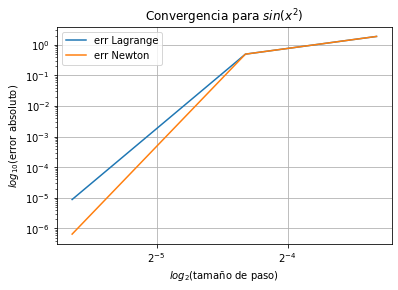

In [ ]:
## ÓRDENES DE CONVERGENCIA: f1(x)=sin(x^2)
#Para obtener los órdenes de convergencia, en las clases se graficó el 
#log(Error absoluto) vs. log(tamaño de paso). Entonces se obtendrán estos dos
#valores para ese efecto.
h = [0.1,0.05,0.02] #tamaño de paso 1/10,1/20 y 1/50 (será el mismo para las 3
                    #funciones)
Lagrangeyf1 = []      #Corresponde a las coordenadas en y de los errores en Lagrange
Newtonyf1 = []        #Corresponde a las coordenadas en y de los errores en Newton
for i in range(3):
  Lagrangeyf1.append(erroreslagrange[i])
  Newtonyf1.append(erroresnewton[i])

print(Lagrangeyf1)
print(Newtonyf1)
## GRÁFICO 
#fig = plt.figure(figsize = (10,8)) #agrandar la figura
fig, ax = plt.subplots()
ax.set_xscale('log',basex=2)
ax.set_yscale('log',basey=10)
plt.plot(h,Lagrangeyf1,label='err Lagrange')
plt.plot(h,Newtonyf1,label='err Newton')
plt.title("Convergencia para $sin(x^2)$")
plt.xlabel("$log_2$(tamaño de paso)")
plt.ylabel("$log_{10}$(error absoluto)")
plt.legend() 
plt.grid()

#De la gráfica, podemos notar que el orden de convergencia para el método de 
#Lagrange es de aprox. 10^-5 y para el método de Newton es de 10^-6. Es decir,
#el error de Lagrange llega a un orden de 10^-5 y el de Newton de 10^-6.

[0.0065208531967216685, 1.4980307047036956e-05, 1.4587161105600045e-05]
[0.0065208531967360615, 1.4980306899964047e-05, 1.791652620944384e-07]


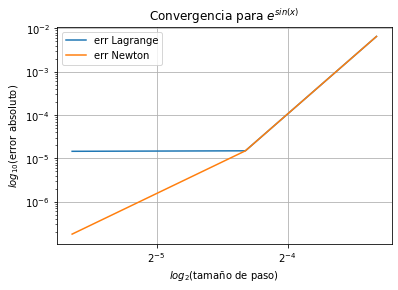

In [ ]:
## ÓRDENES DE CONVERGENCIA: f2(x)=exp[sin(x)]
Lagrangeyf2 = []      #Corresponde a las coordenadas en y de los errores en Lagrange
Newtonyf2 = []        #Corresponde a las coordenadas en y de los errores en Newton
for i in range(3):
  Lagrangeyf2.append(erroreslagrange[i+3])
  Newtonyf2.append(erroresnewton[i+3])

print(Lagrangeyf2)
print(Newtonyf2)
## GRÁFICO 
fig, ax = plt.subplots()
ax.set_xscale('log',basex=2)
ax.set_yscale('log',basey=10)
plt.plot(h,Lagrangeyf2,label='err Lagrange')
plt.plot(h,Newtonyf2,label='err Newton')
plt.title("Convergencia para $e^{sin(x)}$")
plt.xlabel("$log_2$(tamaño de paso)")
plt.ylabel("$log_{10}$(error absoluto)")
plt.legend() 
plt.grid()

#De la gráfica, podemos notar que el orden de convergencia para el método de 
#Lagrange es de poco menos de 10^-5 y para el método de Newton es de 10^-7,
#aproximadamente. Es decir, el error de Lagrange llega a un orden de 10^-5 y el 
#de Newton de 10^-7.

[1.2865067752058092, 74.67162666607781, 87985666.63197635]
[1.2865067752057506, 74.67162666589059, 87985666.40090114]


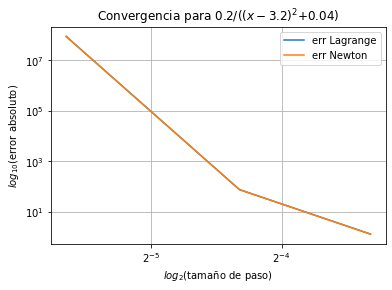

In [ ]:
## ÓRDENES DE CONVERGENCIA: f3(x)=0.2/((x-3.2)^2+0.04)
Lagrangeyf3 = []      #Corresponde a las coordenadas en y de los errores en Lagrange
Newtonyf3 = []        #Corresponde a las coordenadas en y de los errores en Newton
for i in range(3):
  Lagrangeyf3.append(erroreslagrange[i+6])
  Newtonyf3.append(erroresnewton[i+6])

print(Lagrangeyf3)
print(Newtonyf3)
## GRÁFICO 
fig, ax = plt.subplots()
ax.set_xscale('log',basex=2)
ax.set_yscale('log',basey=10)
plt.plot(h,Lagrangeyf3,label='err Lagrange')
plt.plot(h,Newtonyf3,label='err Newton')
plt.title("Convergencia para 0.2/($(x-3.2)^2$+0.04)")
plt.xlabel("$log_2$(tamaño de paso)")
plt.ylabel("$log_{10}$(error absoluto)")
plt.legend() 
plt.grid()

#Al contrario de las gráficas anteriores, notemos que esta decrece en lugar de
#crecer para AMBOS métodos (Lagrange y Newton), pues el error va creciendo 
#conforme aumenta el número de puntos. Podríamos decir que, de cierto modo, diverge.
#La función de error de Newton está encima de la de Lagrange y el punto más
#cercano al eje de las y's es aproximadamente 10^8 (¡demasiado grande!).

### (C)

In [ ]:
## PERTURBACIÓN SINUSOIDAL
#En el tema visto en clase sobre las perturbaciones, se traducían directamente 
#como "ruido" en las funciones. El ruido se agregaba a las f(x) sumando una nueva 
#función, en este caso, una función seno con los factores establecidos.
pollagrangeper = [] #Aquí se guardarán las coordenadas de los polinomios generados
#en cada función (f1,f2,f3) como un arreglo, con la perturbación.
polnewtonper = []

def pert(orden,x):
  return((10**orden)*np.sin(x))

#Cálculo de los polinomios + ruido
for xL in [np.linspace(a,b,10),np.linspace(a,b,20),np.linspace(a,b,50)]:
  for yL in [f1(xL), f2(xL), f3(xL)]:
    for ruido in [pert(-4,xL),pert(-5,xL),pert(-6,xL)]:
      pollagrangeper.append(lagrange(xL,yL+ruido))
      polnewtonper.append(interp_newton(xL,yL+ruido))

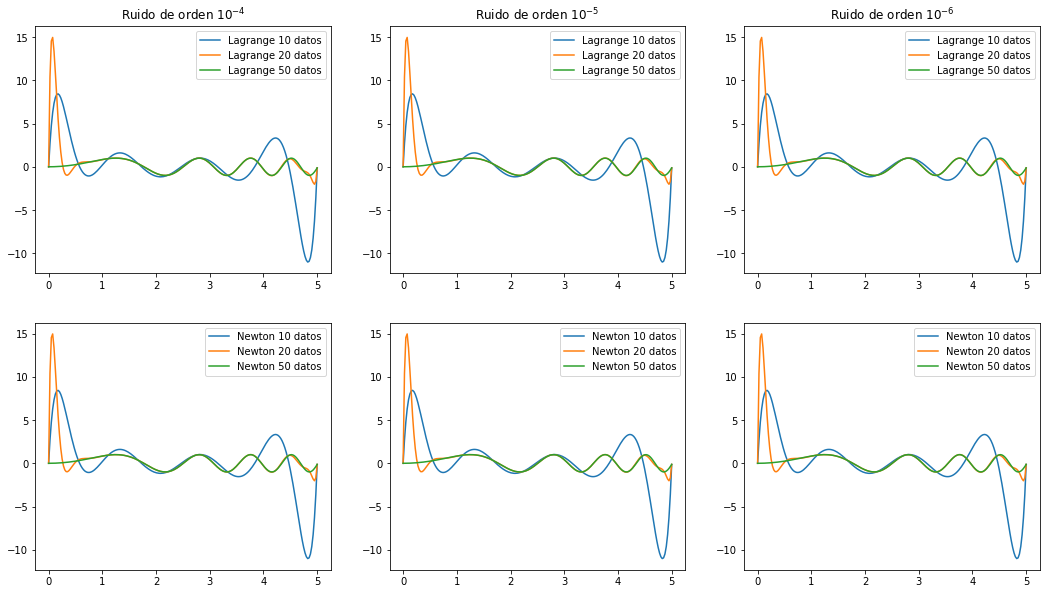

In [ ]:
## GRÁFICO PARA f1(x)=sin(x^2) con interpolación de Lagrange y Newton (+ruido)
fig, axs= plt.subplots(2,3)
orden=['$10^{-4}$','$10^{-5}$','$10^{-6}$']
for i in range(2):
    if i == 0:
      for j in range(3):
        axs[i,j].set_title('Ruido de orden '+ orden[j])
        axs[i,j].plot(inter,pollagrangeper[j](inter),label='Lagrange 10 datos')
        axs[i,j].plot(inter,pollagrangeper[j+9](inter),label='Lagrange 20 datos')
        axs[i,j].plot(inter,pollagrangeper[j+18](inter),label='Lagrange 50 datos')
        axs[i,j].legend()
    if i == 1:
      for j in range(3):
        axs[i,j].plot(inter,polnewtonper[j](inter),label='Newton 10 datos')
        axs[i,j].plot(inter,polnewtonper[j+9](inter),label='Newton 20 datos')
        axs[i,j].plot(inter,polnewtonper[j+18](inter),label='Newton 50 datos')
        axs[i,j].legend()
fig.set_size_inches(18, 10)

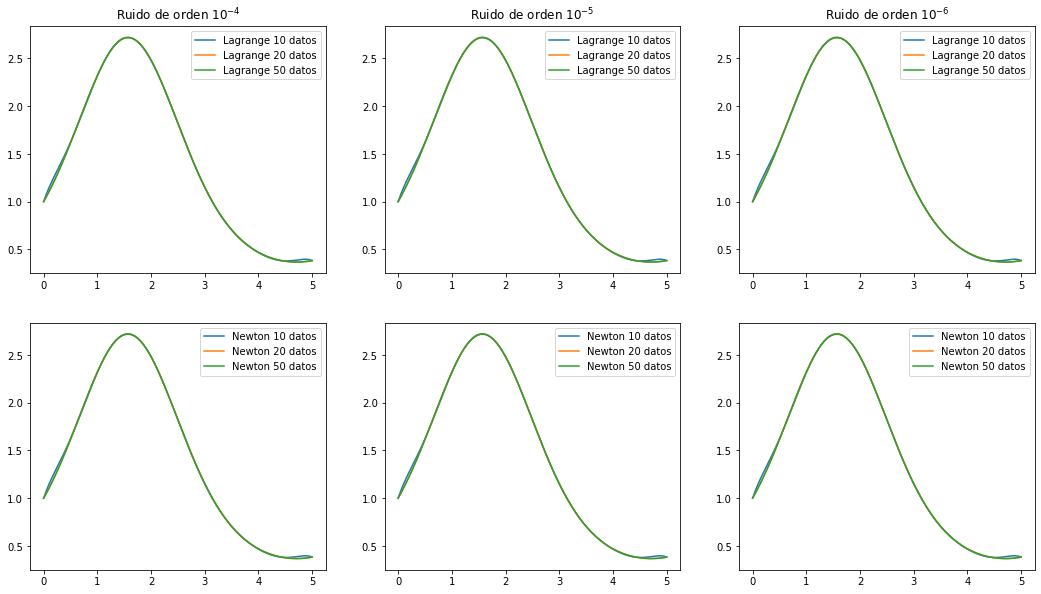

In [ ]:
## GRÁFICO PARA f2(x)=exp[sin(x)] con interpolación de Lagrange y Newton (+ruido)
fig, axs= plt.subplots(2,3)
orden=['$10^{-4}$','$10^{-5}$','$10^{-6}$']
for i in range(2):
    if i == 0:
      for j in range(3):
        axs[i,j].set_title('Ruido de orden '+ orden[j])
        axs[i,j].plot(inter,pollagrangeper[j+3](inter),label='Lagrange 10 datos')
        axs[i,j].plot(inter,pollagrangeper[j+12](inter),label='Lagrange 20 datos')
        axs[i,j].plot(inter,pollagrangeper[j+21](inter),label='Lagrange 50 datos')
        axs[i,j].legend()
    if i == 1:
      for j in range(3):
        axs[i,j].plot(inter,polnewtonper[j+3](inter),label='Newton 10 datos')
        axs[i,j].plot(inter,polnewtonper[j+12](inter),label='Newton 20 datos')
        axs[i,j].plot(inter,polnewtonper[j+21](inter),label='Newton 50 datos')
        axs[i,j].legend()
fig.set_size_inches(18, 10)

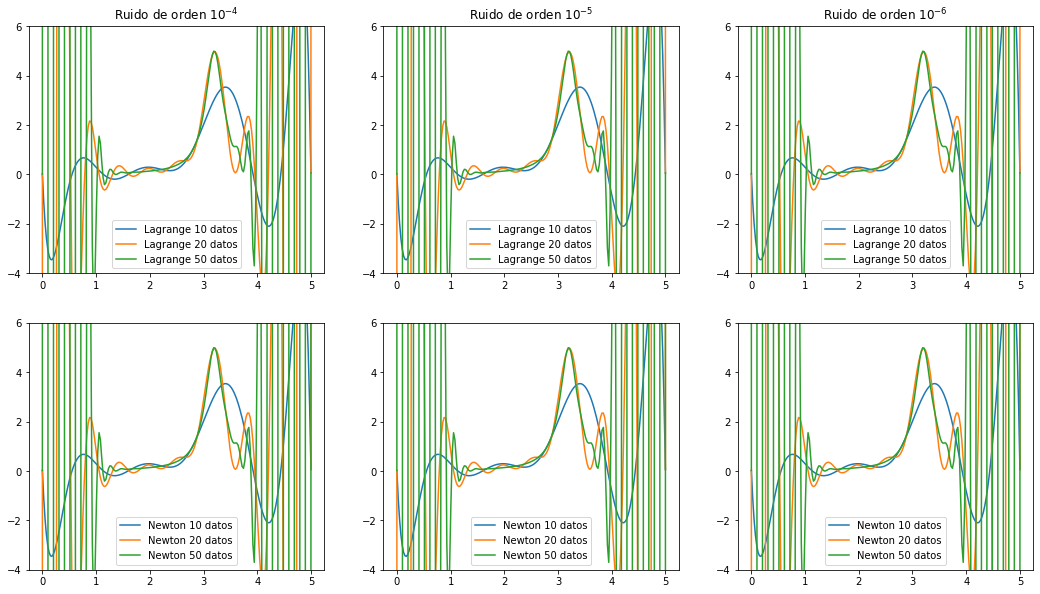

In [ ]:
## GRÁFICO PARA f3(x)=0.2/((x-3.2)^2+0.04) con interpolación de Lagrange y Newton (+ruido)
fig, axs= plt.subplots(2,3)
orden=['$10^{-4}$','$10^{-5}$','$10^{-6}$']
for i in range(2):
    if i == 0:
      for j in range(3):
        axs[i,j].set_title('Ruido de orden '+ orden[j])
        axs[i,j].set_ylim(-4,6)
        axs[i,j].plot(inter,pollagrangeper[j+6](inter),label='Lagrange 10 datos')
        axs[i,j].plot(inter,pollagrangeper[j+15](inter),label='Lagrange 20 datos')
        axs[i,j].plot(inter,pollagrangeper[j+24](inter),label='Lagrange 50 datos')
        axs[i,j].legend()
    if i == 1:
      for j in range(3):
        axs[i,j].set_ylim(-4,6)
        axs[i,j].plot(inter,polnewtonper[j+6](inter),label='Newton 10 datos')
        axs[i,j].plot(inter,polnewtonper[j+15](inter),label='Newton 20 datos')
        axs[i,j].plot(inter,polnewtonper[j+24](inter),label='Newton 50 datos')
        axs[i,j].legend()
fig.set_size_inches(18, 10)

Así como se observó en las gráficas sin ruido, las interpolaciones de Lagrange y Newton siguen siendo bastante parecidas visualmente incluso con el ruido. Aparentemente, el ruido no tiene un efecto significativo en los gráficos.
Las diferencias esperarían observarse en el cálculo de los errores, de donde se graficarán los órdenes de convergencia.

In [ ]:
## CÁLCULO DE ERRORES
#Para facilitar el cálculo de estos errores y coicidir con los datos 
#graficados, se tomará el intervalo de 0 a 5 con 200 datos: inter
erroreslagrange_pert = []
erroresnewton_pert = []
for i in [f1,f2,f3]:
  for j in range(3):
    for n in range(3):
      if i == f1:
        erroreslagrange_pert.append(np.mean(np.abs(i(inter)-pollagrangeper[j+9*n](inter))))
        erroresnewton_pert.append(np.mean(np.abs(i(inter)-polnewtonper[j+9*n](inter))))
      if i == f2:
        erroreslagrange_pert.append(np.mean(np.abs(i(inter)-pollagrangeper[j+9*n+3](inter))))
        erroresnewton_pert.append(np.mean(np.abs(i(inter)-polnewtonper[j+9*n+3](inter))))
      if i == f3:
        erroreslagrange_pert.append(np.mean(np.abs(i(inter)-pollagrangeper[j+9*n+6](inter))))
        erroresnewton_pert.append(np.mean(np.abs(i(inter)-polnewtonper[j+9*n+6](inter))))

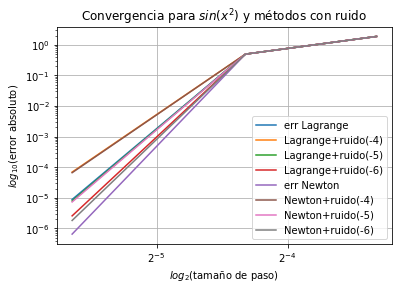

In [ ]:
## GRÁFICO ÓRDENES DE CONVERGENCIA: f1(x)=sin(x^2)
#Para el paso se usará h = [0.1,0.05,0.02]
Lagrangey_per4f1 = []
Lagrangey_per5f1 = []
Lagrangey_per6f1 = []
Newtony_per4f1 = []
Newtony_per5f1 = []
Newtony_per6f1 = []

for i in range(3):
     Lagrangey_per4f1.append(erroreslagrange_pert[i])
     Lagrangey_per5f1.append(erroreslagrange_pert[i+3])
     Lagrangey_per6f1.append(erroreslagrange_pert[i+6])
     Newtony_per4f1.append(erroresnewton_pert[i])
     Newtony_per5f1.append(erroresnewton_pert[i+3])
     Newtony_per6f1.append(erroresnewton_pert[i+6])
 
#fig = plt.figure(figsize = (10,8)) #agrandar la figura
fig, ax = plt.subplots()
ax.set_xscale('log',basex=2)
ax.set_yscale('log',basey=10)
plt.plot(h,Lagrangeyf1,label='err Lagrange')
plt.plot(h,Lagrangey_per4f1,label='Lagrange+ruido(-4)')
plt.plot(h,Lagrangey_per5f1,label='Lagrange+ruido(-5)')
plt.plot(h,Lagrangey_per6f1,label='Lagrange+ruido(-6)')
plt.plot(h,Newtonyf1,label='err Newton')
plt.plot(h,Newtony_per4f1,label='Newton+ruido(-4)')
plt.plot(h,Newtony_per5f1,label='Newton+ruido(-5)')
plt.plot(h,Newtony_per6f1,label='Newton+ruido(-6)')
plt.title("Convergencia para $sin(x^2)$ y métodos con ruido")
plt.xlabel("$log_2$(tamaño de paso)")
plt.ylabel("$log_{10}$(error absoluto)")
plt.legend() 
plt.grid()

#Se puede observar en el gráfico que para la interpolación de Lagrange, el error
#de las funciones con ruido disminuye conforme su orden aumenta, y el último
#orden 10^-6 tiene un orden relativamente menor al obtenido en Lagrange sin ruido.
#Por otro lado, para el método de Newton se observa que los ordenes de convergencia
#para el método con ruido son mayores que el método sin ruido, es decir, su error
#es mayor a comparación con la interpolación de Newton sin ruido.

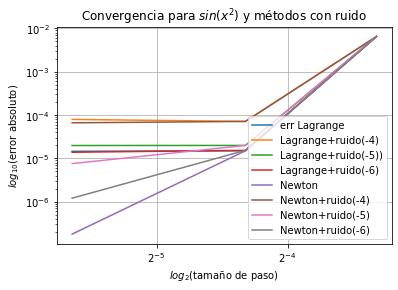

In [ ]:
## GRÁFICO ÓRDENES DE CONVERGENCIA: f2(x)=exp[sin(x)]
#Para el paso se usará h = [0.1,0.05,0.02]
Lagrangey_per4f2 = []
Lagrangey_per5f2 = []
Lagrangey_per6f2 = []
Newtony_per4f2 = []
Newtony_per5f2 = []
Newtony_per6f2 = []

for i in range(3):
     Lagrangey_per4f2.append(erroreslagrange_pert[i+9])
     Lagrangey_per5f2.append(erroreslagrange_pert[i+12])
     Lagrangey_per6f2.append(erroreslagrange_pert[i+15])
     Newtony_per4f2.append(erroresnewton_pert[i+9])
     Newtony_per5f2.append(erroresnewton_pert[i+12])
     Newtony_per6f2.append(erroresnewton_pert[i+15])
 
#fig = plt.figure(figsize = (10,8)) #agrandar la figura
fig, ax = plt.subplots()
ax.set_xscale('log',basex=2)
ax.set_yscale('log',basey=10)
plt.plot(h,Lagrangeyf2,label='err Lagrange')
plt.plot(h,Lagrangey_per4f2,label='Lagrange+ruido(-4)')
plt.plot(h,Lagrangey_per5f2,label='Lagrange+ruido(-5))')
plt.plot(h,Lagrangey_per6f2,label='Lagrange+ruido(-6)')
plt.plot(h,Newtonyf2,label='Newton')
plt.plot(h,Newtony_per4f2,label='Newton+ruido(-4)')
plt.plot(h,Newtony_per5f2,label='Newton+ruido(-5)')
plt.plot(h,Newtony_per6f2,label='Newton+ruido(-6)')
plt.title("Convergencia para $sin(x^2)$ y métodos con ruido")
plt.xlabel("$log_2$(tamaño de paso)")
plt.ylabel("$log_{10}$(error absoluto)")
plt.legend() 
plt.grid()

#De este gráfico se observa que, para la interpolación de Lagrange con orden de
#convergencia en 10^-5, es ligeramente mayor a la interpolación con ruido de orden
#10^-6, mientras que el resto tiene un orden mayor a comparación. Sucede igual que
#en el gráfico anterior para la función 1. Para la interpolación de Newton
#también sucede como en el caso anterior de la función 1, donde el orden de 
#convervencia para la interpolación sin ruido es menor (su error es menor) a 
#comparación de aquellas con ruido. El método de Newton tiene un orden de convergencia
#menor (hasta cierto punto, más preciso que el método de Lagrange).

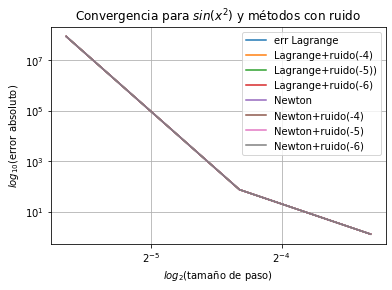

In [ ]:
## ÓRDENES DE CONVERGENCIA: f3(x)=0.2/((x-3.2)^2+0.04)
#Para el paso se usará h = [0.1,0.05,0.02]
Lagrangey_per4f3 = []
Lagrangey_per5f3 = []
Lagrangey_per6f3 = []
Newtony_per4f3 = []
Newtony_per5f3 = []
Newtony_per6f3 = []

for i in range(3):
     Lagrangey_per4f3.append(erroreslagrange_pert[i+18])
     Lagrangey_per5f3.append(erroreslagrange_pert[i+21])
     Lagrangey_per6f3.append(erroreslagrange_pert[i+24])
     Newtony_per4f3.append(erroresnewton_pert[i+18])
     Newtony_per5f3.append(erroresnewton_pert[i+21])
     Newtony_per6f3.append(erroresnewton_pert[i+24])
 
#fig = plt.figure(figsize = (10,8)) #agrandar la figura
fig, ax = plt.subplots()
ax.set_xscale('log',basex=2)
ax.set_yscale('log',basey=10)
plt.plot(h,Lagrangeyf3,label='err Lagrange')
plt.plot(h,Lagrangey_per4f3,label='Lagrange+ruido(-4)')
plt.plot(h,Lagrangey_per5f3,label='Lagrange+ruido(-5))')
plt.plot(h,Lagrangey_per6f3,label='Lagrange+ruido(-6)')
plt.plot(h,Newtonyf3,label='Newton')
plt.plot(h,Newtony_per4f3,label='Newton+ruido(-4)')
plt.plot(h,Newtony_per5f3,label='Newton+ruido(-5)')
plt.plot(h,Newtony_per6f3,label='Newton+ruido(-6)')
plt.title("Convergencia para $sin(x^2)$ y métodos con ruido")
plt.xlabel("$log_2$(tamaño de paso)")
plt.ylabel("$log_{10}$(error absoluto)")
plt.legend() 
plt.grid()

#Como se mencionó en la gráfica para los métodos sin ruido en el punto B, debido
#a la forma de la función 3 y su comportamiento oscilante es que el orden de 
#convergencia o el error para este caso particular sigue siendo grande.

## **Problema 3: Derivación numérica**

En 1928, George Gamow propuso una teoría muy exitosa del decaímiento $\alpha$, según la cual la partícula $α$ se mueve libremente dentro del núcleo y se emite después de atravesar la barrera potencial entre ella y el núcleo hijo. En otras palabras, la partícula $α$, de carga $Z_2$, cuya energía es $E$, está atrapada en un pozo potencial de radio R por la barrera potencial:

$$V(r)=\frac{Z_1Z_2e^2}{4\pi\epsilon_0 r}$$

para $r>R$.

$Z_1 =Z-2, \quad Z_2=2$, donde Z es la carga del núcleo de radio R.

$r$: es el radio fuera del núcleo ($r>R$ y con A, número de masa) donde:

$$R = 1.5\times 10^{-15}\,A^{1/3}\,{\rm m}=2.0\times 10^{-15}\,Z_1^{\,1/3}\,{\rm m}$$

a) Calcule la fuerza que experimenta la partícula y analice $\alpha$ para $r\in [R,3R]$, utilizando los tres esquemas de diferencias finitas.

b) Comparar los esquemas con la solución analítica, calcular los errores, órdenes de convergencia y detallar su análisis.

### (A)

Se debe tener en cuenta que el potencial eléctrico U se puede escribir como:

$$U=-\int_{a}^{b} \vec{F}d\vec{r} \rightarrow F=-\frac{dU}{dr}=-(-\frac{Z_1Z_2e^2}{4\pi\epsilon_0 r^2})$$

En este caso U es equivalente a la V(r) (barrera de potencial Coulombiana) del problema.

In [ ]:
# Introduce tu respuesta aquí
import numpy as np
import matplotlib.pyplot as plt
#Constantes
Z = 50                  #número atómico del radioisótopo padre. Por modificaciones
                        #en el problema, se agregó que Z tenía el valor definido de 50
e_0 = 8.85#e-12          #permitividad eléctrica del vacío
#R = 2e-15*(Z-2)**(1/3)  #radio del núcleo en metros
R = 2*(Z-2)**(1/3)       #radio del núcleo en fermi
#Se usará el radio del núcleo en unidades de fermi en lugar de su equivalente en 
#metros para que sea apreciable en las gráficas.
a = R
b = 3*R
h = 0.1                #tamaño de paso propuesto
N = round((b-a)/h)        #redondear el resultado, el cual será la cantidad de datos
r = np.linspace(a,b,N)

#Hay que resaltar que a los valores de e_0 y R que se encontraban en notación 
#científica, se les fue removido el factor de e^ pues generaban conflictos al 
#graficarlos los valores de forma directa, pero esas potencias fueron agragedas 
#al momento de graficarlos (los resultados no se ven afectados más que en el 
#orden de las potencias).

#Funciones
def pot(r):
  return (Z-2)*2*np.e**2/(4*np.pi*e_0*r) 
def derpot(r):
  return (Z-2)*2*np.e**2/(4*np.pi*e_0*r**2)

def der(f,a,h,met):        #derivadas por diferencias finitas
  if met == 'centrada':
    return (f(a + h) - f(a - h))/(2*h)
  elif met == 'adelante':
    return (f(a + h) - f(a))/h
  elif met == 'atras':
    return (f(a) - f(a - h))/h

dif_fin = []
#Se genera un arreglo con los valores de las derivadas por diferencias finitas
#en el intervalo [R,3R] para r
for i in ['centrada','adelante','atras']:
  dif_fin.append(-der(pot,r,h,met=i)) #el signo menos aparece pues F=-dV/dr 

### (B)

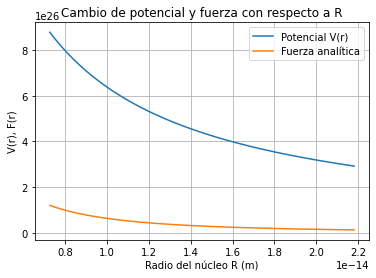

In [ ]:
## GRÁFICAS
#Para comparar los esquemas de solución por diferencias finitas y de forma 
#analítica, se graficarán los datos obtenidos.

plt.plot(r*1e-15,pot(r)*1e27,label='Potencial V(r)') #1/(1e-12*1e-15)=1e-27
plt.plot(r*1e-15,derpot(r)*1e27,label='Fuerza analítica')
plt.title("Cambio de potencial y fuerza con respecto a R")
plt.xlabel("Radio del núcleo R (m)")
plt.ylabel("V(r), F(r)")
plt.legend() 
plt.grid()

# La siguiente liga es de uso personal, fue empleada para encontrar el "truco"
#de multiplicar los valores por sus potencias hasta el momento de graficar.
# En matplotlib The default tick formatter, revisar: https://matplotlib.org/stable/gallery/ticks_and_spines/scalarformatter.html#sphx-glr-gallery-ticks-and-spines-scalarformatter-py 

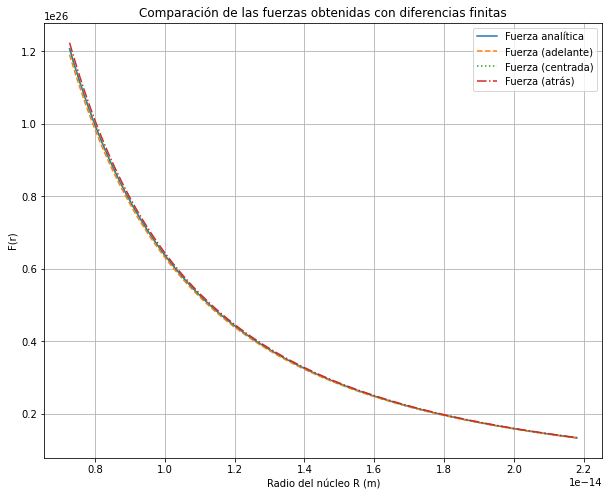

In [ ]:
#Quitar el comentario de los límites en x permitirá tener un acercamiento en las
#funciones. Es fácil notar de ahí que el método "atrás" y "adelante" quedan por
#encima y debajo (respectivamente) de la función analítica y aparentemente el
#"centrado" queda sobre la función analítica (pero las diferencias serán más
#visibles con el cálculo de los errores).
fig = plt.figure(figsize = (10,8)) #agrandar la figura
plt.plot(r*1e-15,derpot(r)*1e27,label='Fuerza analítica')
plt.plot(r*1e-15,dif_fin[1]*1e27,label='Fuerza (adelante)',linestyle='dashed')
plt.plot(r*1e-15,dif_fin[0]*1e27,label='Fuerza (centrada)',linestyle='dotted')
plt.plot(r*1e-15,dif_fin[2]*1e27,label='Fuerza (atrás)',linestyle='dashdot')
#plt.xlim(1.0*1e-14,1.10*1e-14)
plt.title("Comparación de las fuerzas obtenidas con diferencias finitas")
plt.xlabel("Radio del núcleo R (m)")
plt.ylabel("F(r)")
plt.legend() 
plt.grid()

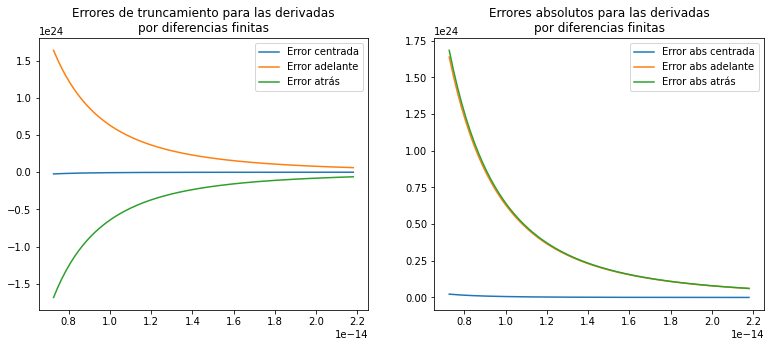

In [ ]:
## CÁLCULO DE LOS ERRORES
#De acuerdo a lo visto en clase, se calcularán dos errores: los errores de 
#truncamiento y los errores absolutos (que serán los de truncamiento con valor
#absoluto). Para calcular el error de truncamiento se restan los valores de la 
#función analítica menos los valores del método.
tipo = ['centrada','adelante','atrás']
error = []
error_abs = []
for i in range(3):    #Aquí se obtienen las coordenadas para los errores
  error.append(derpot(r)-dif_fin[i])
  error_abs.append(np.abs(derpot(r)-dif_fin[i]))

## GRÁFICOS
fig, axs= plt.subplots(1,2)
for i in range(3):
  axs[0].plot(r*1e-15,error[i]*1e27,label='Error '+tipo[i])
  axs[0].set_title('Errores de truncamiento para las derivadas\npor diferencias finitas')
  axs[1].plot(r*1e-15,error_abs[i]*1e27,label='Error abs '+tipo[i])
  axs[1].set_title('Errores absolutos para las derivadas\npor diferencias finitas')
axs[0].legend()
axs[1].legend()
fig.set_size_inches(13,5)

#En esta sección, se le agregó la potencia del radio y de la fuerza (1e-15 y 
#1e27, respectivamente) ¿Tiene sentido tener errores tan grandes? Hasta cierto
#punto se podría pensar que sí, pues los valores de fuerza son también 
#descomunalmente grandes, aunque no hay forma de comparar el error con la función
#analítica. Por otro lado, el comportamiento de las gráficas es el esperado, 
#comparado a los ejemplos vistos en la sesión. 

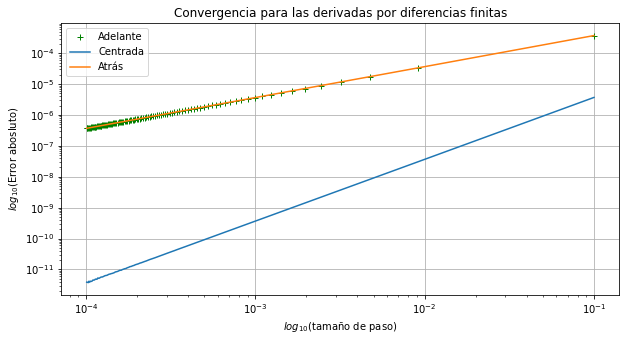

In [ ]:
## ÓRDENES DE CONVERGENCIA
#Así como en el problema 2b, se usarán distintos tamaños de paso para calcular
#los órdenes de convergencia. Se usará el mismo intervalo [a,b].
h_aux = [] #Aquí se guardarán los tamaños de paso
errcen = []
errade = []
erratr = []

for i in range(10,10000,100):
  h = 1/i #tamaño del paso 
  N = round((b-a)/h)
  r = np.linspace(a,b,N)
  h_aux.append(h) 
  errcen.append(np.mean(np.abs(derpot(r)+der(pot,r,h,met='centrada'))))    #Aquí el signo es positivo pues pot(r)-(-der(pot,a,h,met))
  errade.append(np.mean(np.abs(derpot(r)+der(pot,r,h,met='adelante'))))
  erratr.append(np.mean(np.abs(derpot(r)+der(pot,r,h,met='atras'))))

#Gráfico
fig, ax = plt.subplots()
ax.set_xscale('log',basex=10)
ax.set_yscale('log',basey=10)
plt.plot(h_aux,errade,"g+",label='Adelante')
plt.plot(h_aux,errcen,label='Centrada')
plt.plot(h_aux,erratr,label='Atrás')
plt.title('Convergencia para las derivadas por diferencias finitas')
plt.xlabel('$log_{10}$(tamaño de paso)')
plt.ylabel('$log_{10}$(Error abosluto)')
plt.legend()
plt.grid()
fig.set_size_inches(10,5)
#De la gráfica se puede observar que los errores del método hacia adelante y 
#hacia atrás tiene un orden de convergencia básicamente igual, de 10^-6 aprox.
#Mientras que, como era de esperarse, el error de menor orden (10^-11) lo tiene
#el método centrado.
#Aquí existió un pequeño conflicto al momento de graficar, ya que en las gráficas
#pasadas se consideraba el orden de femi y 10^27 que habían adquirido los datos,
#que sin duda habrían afectado el valor de convergencia final de cada método, y
#esas potencias no fueron agregadas en el gráfico de la convergencia.

## **Problema 4: Integración numérica**

La carga a partir de la densidad radial de carga lineal, $\lambda$, sobre el área de la sección transversal del cilindro, está definida por:

$$q_{total}=\int_A \lambda(r)dA(r)$$

donde, dA es el diferencial de área de la base del cilindro:

$$q_{total}=\int_A \lambda(r)(2\pi r dr)$$

Sabemos que la densidad tiene la forma:

$$\lambda(r)=\lambda_0 \left(1-\frac{r^2}{a^2} \right)$$
donde: $\sigma_0=1.3 x10^{-6}C/m^2, \quad a=1x10^{-3}m$ 

Y el campo eléctrico:

$$\vec{E}=\frac{kq_{total}}{d^2}\hat r$$

d: distancia de la superficie al espacio a evaluar el campo eléctrico. ($d\gt r$)


a) Determina la distribución de la carga y campo eléctrico (a distancias $d \in \{ r+r/4,r+r/2\}$ ) en función al radio utilizando 3 métodos de integración.

b) Obtener la solución analítica, comparar los errores de distintos métodos y detallar análisis.



### (A)

In [ ]:
# Introduce tu respuesta aquí
import numpy as np
import matplotlib.pyplot as plt
# CONSTANTES
L0 = 1.3e-6     #densidad de carga superficial (sigma,oficialmente) en C/m^2
a = 0.001        # (m)
k = 9e9         #cte de Coulomb (Nm^2/C^2)
#Se propone que el cilindro evaluado tenga un radio r=1 (por simplicidad). Por lo
#que los límites de integración serán:
r1 = 0
r2 = 1
d1 = 1 + 1/4    #límites para evaluar E, considerando que r=1 
d2 = 1 + 1/2
n = 50          #se propone evaluar 100 puntos

# FUNCIONES
def L(r):       #función para la densidad
  return 2*np.pi*L0*r*(1-r**2/a**2)
def E(q,d):     #función campo eléctrico
  return k*q/d**2

## MÉTODOS DE INTEGRACIÓN
# Punto medio
def pm(f,a,b,n):        #n es el número de puntos a considerar
  h = (b-a)/n           #tamaño de paso
  res = 0               #variable que guardará el resultado, se inicia en 0
  for i in range(n):
    res += f((a + h/2) + i*h)
  res = res*h
  return res

# Regla del trapecio
def rt(f,a,b,n):
  h = 1/n
  res = 0.5 * (f(a) + f(b)) * h 
  for i in range(1,n):
    res = res + h * f(i * h) 
  return res

# Regla de Simpson 1/3
def sim13(f,a,b,n):
  h = (b - a)/n
  res = 0
  for i in range(1,round(n)):
    x = a + i*h
    if i % 2 == 0: #i%2 evalúa si "i" es divisible entre 2, dando como residuo 0
      res = res + 2*f(x)
    else:
      res = res + 4*f(x)
  res = res + f(a) + f(b)
  area = res*(h/3)
  return area

In [ ]:
#Aquí se obtienen los valores de la carga
q_pm = pm(L,r1,r2,n)
q_rt = rt(L,r1,r2,n)
q_sim13 = sim13(L,r1,r2,n)
#Aquí el campo
interd = np.linspace(d1,d2,n) 
E_pm = E(q_pm,interd)
E_rt = E(q_rt,interd)
E_sim13 = E(q_sim13,interd)

print("Valor de q con punto medio:\t\t",q_pm)
print("Valor de q con regla del trapecio:\t",q_rt)
print("Valor de q con Simpson 1/3:\t\t",q_sim13)

Valor de q con punto medio:		 -2.04162273371795
Valor de q con regla del trapecio:	 -2.0428479548528498
Valor de q con Simpson 1/3:		 -2.0420311407629166


### (B)

Para la solución analítica:
$$2\pi\lambda_0\int_0^1r(1-\frac{r^2}{a^2})dr=\pi\lambda_0(1-\frac{1}{2a^2})$$
Considerando que la $\lambda$ es realmente la densidad de carga superficial y no la lineal, como se menciona al principio del problema (por convención).

Carga total obtenida de forma analítica:  -2.042031140762916


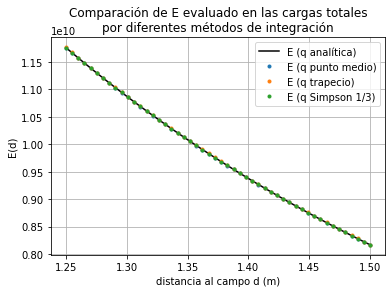

In [ ]:
## Solución analítica
qan = np.pi*L0*(1-1/(2*a**2))   #Aquí se guarda el valor q total obtenido de forma analítica
E_an = E(qan,interd)            #Se calcula el campo para la carga analítica
print("Carga total obtenida de forma analítica: ", qan)
#Se ha agregado esta gráfica para mostrar cómo cambia el campo eléctrico cuando
#se evalúa con los diferentes métodos de integración. Se ha decidido quitar el 
#signo negativo en los valores de E (pues las cargas son negativas, y la dirección
#que adquiere el campo también es negativa) para que sea más visual el hecho de 
#que el campo eléctrico "decae" conforme la distancia aumenta.

#fig = plt.figure(figsize = (10,8)) #agrandar la figura
plt.plot(interd,-E_an,"k-",label='E (q analítica)')
plt.plot(interd,-E_pm,".",label='E (q punto medio)')
plt.plot(interd,-E_rt,".",label='E (q trapecio)')
plt.plot(interd,-E_sim13,".",label='E (q Simpson 1/3)')
plt.title('Comparación de E evaluado en las cargas totales\npor diferentes métodos de integración')
plt.xlabel('distancia al campo d (m)')
plt.ylabel('E(d)')
plt.legend()
plt.grid()

Error de punto medio:		 -0.0004084070449663635
Error de regla del trapecio:	 0.0008168140899336152
Error de Simpson 1/3:		 4.440892098500626e-16


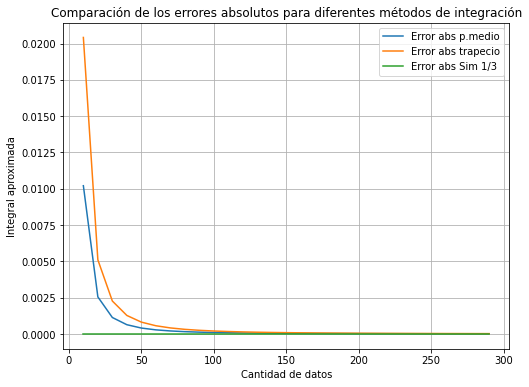

In [ ]:
#Para el cálculo de los errores, se procederá como en los problemas anteriores:
#restando los valores de la analítica menos los de cada método. Se calcularán 
#los errores de las cargas totales. Con los errores obtenidos, se podría afirmar
#que el método de Simpson 1/3 para la obtención de la carga total en la superficie
#es el más acertado al valor obtenido analíticamente, seguido de punto medio y
#finalmente de trapecio.
print("Error de punto medio:\t\t",qan - q_pm)
print("Error de regla del trapecio:\t",qan - q_rt)
print("Error de Simpson 1/3:\t\t",qan - q_sim13)
err_pm = []
err_rt = []
err_sim13 = []
n = []
for i in range(10,300,10):
  n.append(i)
  err_pm.append(np.abs(qan-pm(L,r1,r2,i)))
  err_rt.append(np.abs(qan-rt(L,r1,r2,i)))
  err_sim13.append(np.abs(qan-sim13(L,r1,r2,i)))

#El siguiente gráfico se muestra cómo los errores absolutos de cada método se 
#ven reducidos conforme se evalúan mas secciones, es decir, mientras más fragmentos
#debajo de la curva se agreguen, más preciso será el valor arrojado.
fig = plt.figure(figsize = (8,6)) #agrandar la figura
plt.plot(n,err_pm,label='Error abs p.medio')
plt.plot(n,err_rt,label='Error abs trapecio')
plt.plot(n,err_sim13,label='Error abs Sim 1/3')
plt.title("Comparación de los errores absolutos para diferentes métodos de integración")
plt.xlabel("Cantidad de datos")
plt.ylabel("Integral aproximada")
plt.legend()
plt.grid()

## **Problema 5:**

Considerar un aro horizontal sin rozamiento de radio R. En este aro enhebro tres objetos con masas idénticas m, y, entre los objetos, tres muelles idénticos, cada uno con una masa constante de fuerza k.

<p align="center">
  <img src="https://habrastorage.org/webt/nz/qz/g4/nzqzg42gjarvpx3yk-fy0qgn20k.png"  width=55% />
</p>



Sabemos que, la energía cinética es:

$$T=\frac{1}{2}mR^2(\dot{\phi_1^2}+\dot{\phi_2^2}+\dot{\phi_3^2})$$

y la energía potencial:

$$U=\frac{1}{2}kR^2 [(\phi_1-\phi_2)^2+(\phi_2-\phi_3)^2+(\phi_3-\phi_1)^2]$$

Resultado: Sistema de EDOs 

$$m\frac{d^2\phi_1}{dt^2}=-k(\phi_1-\phi_2)-k(\phi_1-\phi_3)$$

$$m\frac{d^2\phi_2}{dt^2}=-k(\phi_2-\phi_3)-k(\phi_2-\phi_1)$$

$$m\frac{d^2\phi_3}{dt^2}=-k(\phi_3-\phi_1)-k(\phi_3-\phi_2)$$


a) Encontrar las ecuaciones de movimiento para cada masa usando las ecuaciones de Euler-Lagrange. *(ejemplo en PCP_sesión5.ipynb)*

b) Resolver numéricamente el sistema de ecuaciones con los métodos de Euler y RK de orden 4. Para los datos: $\phi_1=\phi_2/2,\quad \phi_2=\phi_3/2,\quad \phi_3=\pi/10 \quad $ y $\quad \phi_1'=1,\quad \phi_2'=1,\quad \phi_3'=1, \quad R=m=k=1$

c) Mostrar los resultados y explicar la dinámica del sistema en base al resultado de la simulación.

### (A)

In [ ]:
# Introduce tu respuesta aquí
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
## CONSTANTES
R,m,k=sym.symbols('R,m,k',positive= True)
t=sym.symbols('t')      #variable temporal (independiente)

##
phi1=sym.Function('phi1')
phi2=sym.Function('phi2')
phi3=sym.Function('phi3')

#Expresión simbólica de la energía cinética T
T = sym.Rational(1,2)*(m*R**2)*(phi1(t).diff(t)**2+phi2(t).diff(t)**2+phi3(t).diff(t)**2) 
#Expresión simbólica de la energía potencial U
U = sym.Rational(1,2)*(k*R**2)*((phi1(t)-phi2(t))**2+(phi2(t)-phi3(t))**2+(phi1(t)-phi3(t))**2)
L = T - U        #Lagrangiano

#dLp = []    #derivadas del Lagrangiano con respecto a las variables phi
#dLpt = []   #derivada de dLp con respecto al tiempo
eEL = []    #ecuación Euler-Lagrange
eEL_aux = []
for i in [phi1,phi2,phi3]:
  dLp = L.diff(i(t))
  dLpt = L.diff(i(t).diff(t)).diff(t)
  eel = sym.Eq(dLpt,dLp)
  eEL.append(eel)
  eEL_aux.append(eel)   #esta variable auxiliar es para modificar los valores de uno de los arreglos
                        #que servirá como la solución numérica (para agregarle las condiciones iniciales),
                        #mientras que la otra sólo será simbólica (y es la que se imprime más adelante).
for i in range(3):
  eEL_aux[i] = eEL_aux[i].subs([(R,1),(m,1),(k,1)]) #aquí se le agregan los valores R=m=k=1

#La expresiones de cada phi están contenidas en g_pos. 
g_pos = sym.dsolve(eEL) #posición general

ci = {phi1(0):sym.pi/40, sym.diff(phi1(t),t).subs(t,0):1, phi2(0):sym.pi/20, sym.diff(phi2(t),t).subs(t,0):1, 
      phi3(0):sym.pi/10, sym.diff(phi3(t),t).subs(t,0):1} #condiciones iniciales
pos_eq = sym.dsolve(eEL_aux,ics=ci) #aquí se evalúan las condiciones iniciales (solución "analítica")

In [ ]:
g_pos[0]

Eq(phi1(t), C1 + C2*t - (sqrt(3)*C3*sqrt(m)/(3*sqrt(k)) + sqrt(3)*C5*sqrt(m)/(3*sqrt(k)))*sin(sqrt(3)*sqrt(k)*t/sqrt(m)) - (sqrt(3)*C4*sqrt(m)/(3*sqrt(k)) + sqrt(3)*C6*sqrt(m)/(3*sqrt(k)))*cos(sqrt(3)*sqrt(k)*t/sqrt(m)))

In [ ]:
g_pos[1]

Eq(phi2(t), C1 + C2*t + sqrt(3)*C3*sqrt(m)*sin(sqrt(3)*sqrt(k)*t/sqrt(m))/(3*sqrt(k)) + sqrt(3)*C4*sqrt(m)*cos(sqrt(3)*sqrt(k)*t/sqrt(m))/(3*sqrt(k)))

In [ ]:
g_pos[2]

Eq(phi3(t), C1 + C2*t + sqrt(3)*C5*sqrt(m)*sin(sqrt(3)*sqrt(k)*t/sqrt(m))/(3*sqrt(k)) + sqrt(3)*C6*sqrt(m)*cos(sqrt(3)*sqrt(k)*t/sqrt(m))/(3*sqrt(k)))

### (B)

Para resolver las ecuaciones diferenciales de segundo orden, se debe cambiar el orden de las mismas con un cambio de variable tipo y'=x (aquí ya se considera que m=k=1):
$$m\frac{d^2\phi_1}{dt^2}=-k(\phi_1-\phi_2)-k(\phi_1-\phi_3)\longrightarrow \frac{d\phi_1}{dt}=\phi_1'=x_1,\quad \frac{dx_1}{dt}=x_1'=-2\phi_1+\phi_2+\phi_3$$

$$m\frac{d^2\phi_2}{dt^2}=-k(\phi_2-\phi_3)-k(\phi_2-\phi_1)\longrightarrow \frac{d\phi_2}{dt}=\phi_2'=x_2,\quad \frac{dx_2}{dt}=x_2'=-2\phi_2+\phi_3+\phi_1$$

$$m\frac{d^2\phi_3}{dt^2}=-k(\phi_3-\phi_1)-k(\phi_3-\phi_2)\longrightarrow \frac{d\phi_3}{dt}=\phi_3'=x_3,\quad \frac{dx_3}{dt}=x_3'=-2\phi_3+\phi_1+\phi_2$$

Y posteriormente, aplicar el método a (al menos para el método de Euler):
$$\phi_{n(i+1)}=\phi_{n(i)}+hf(t_i,\phi_{n(i)})=\phi_{n(i)}+h\phi_1'$$
$$x_{n(i+1)}=x_{n(i)}+hx'_{n(i)}$$

donde n=1,2,3 (por la cantidad de $\phi$). Ahora se tienen dos ecuaciones diferenciales de primer orden por cada una de segundo orden. Para $\phi_1$, por ejemplo:

$$\frac{d\phi_1}{dt}=\phi_1'=x_1,\quad \phi_1(t=0)=\pi/40$$
$$\frac{dx_1}{dt}=x_1'=-2\phi_1+\phi_2+\phi_3,\quad \phi_1'(t=0)=x_1(0)=1$$

In [ ]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
## EDO de segundo orden
def f(phi):
  eqev = [] #aquí se guardarán las ecuaciones que serán evaluadas en las c.i.
  eqev.append(-2*phi[0]+phi[1]+phi[2])
  eqev.append(-2*phi[1]+phi[0]+phi[2])
  eqev.append(-2*phi[2]+phi[0]+phi[1])
  return eqev
## Condiciones iniciales
#phi10 = sym.pi/40
#phi20 = sym.pi/20
#phi30 = sym.pi/10
ci = [np.pi/40,np.pi/20,np.pi/10]
cid = [1,1,1] #condiciones iniciales en las derivadas

## MÉTODO DE EULER (EDO de segundo orden)
#f: función de la edo
#t0: punto inicial del dominio (tiempo)
t0 = 0 
#tn: punto final del dominio (tiempo)
tn = 10 #tiempo propuesto a evaluar
#y0: condición inicial en x0
#dn: condición inicial en la derivada
#n: número de pasos
def euler(f,t0,tn,y0,d0,n):
  h = (tn-t0)/n  # tamaño de paso (Dominio)
  t0_l = [t0]
  yn_l = [y0]
  dn_l = [d0]
  yn = np.zeros(len(y0))
  dn = np.zeros(len(y0))
  for i in range(n):  # bucle de iteraciones
    eq = f(y0)
    for j in range(len(y0)):
      yn[j] = y0[j] + h*d0[j]
      dn[j] = d0[j] + h*eq[j]
    y0 = np.array(yn)
    d0 = np.array(dn)
    #t0 = t0 + h
    t0 += h 
    t0_l.append(t0)  # almacenando de (Dominio)
    yn_l.append(y0)  # almacenando de (Solucion)
    dn_l.append(d0)  # almacenando de la derivada de la solución
  return (t0_l,yn_l,dn_l)

## MÉTODO RUNGE-KUTTA ORDEN 4
#En este método, se necesitan obtener 4 variables que después se irán evaluando 
#en la fórmula recursiva del método: y_(i+1)=y_(i)+h(k1 + 2k2 + 2k3 + k4)/6
#De la misma forma en que se resolvió el método de Euler, donde se separó la función
#y se evaluaron ahora dos funciones, ocurrirá lo mismo en RK-4:
# http://www.sc.ehu.es/sbweb/fisica_/numerico/diferencial/segundo.html
# http://matema.ujaen.es/jnavas/web_modelos/pdf_mmb08_09/metodos%20numericos.pdf

def RK4(f,t0,tn,y0,d0,n):
  h = (tn-t0)/n
  t0_l = [t0]
  yn_l = [y0]
  dn_l = [d0]
  yaux = np.zeros(len(y0))
  daux = np.zeros(len(d0))
  k1 = np.zeros(len(y0))
  l1 = np.zeros(len(d0))
  k2 = np.zeros(len(y0))
  l2 = np.zeros(len(d0))
  k3 = np.zeros(len(y0))
  l3 = np.zeros(len(d0))
  k4 = np.zeros(len(y0))
  l4 = np.zeros(len(d0))
  for i in range(n):
    for j in range(len(y0)):
      k1[j] = d0[j]
      l1[j] = f(y0)[j]
      k2[j] = (d0[j] + h*0.5*l1[j])
      l2[j] = f(y0 + h*0.5*l1)[j]
      k3[j] = (d0[j] + h*0.5*l2[j])
      l3[j] = f(y0 + h*0.5*l2)[j]
      k4[j] = (d0[j] + h*l3[j])
      l4[j] = f(y0 + h*l3)[j]
      yaux[j] = y0[j]+(h/6)*(k1[j] + 2*k2[j] + 2*k3[j] + k4[j])
      daux[j] = d0[j]+(h/6)*(l1[j] + 2*l2[j] + 2*l3[j] + l4[j])
    y0 = np.array(yaux)
    d0 = np.array(daux)
    t0 += h
    t0_l.append(t0)
    yn_l.append(y0)
    dn_l.append(d0)
  return (t0_l,yn_l,dn_l)

In [ ]:
## Se resuelven las edo por el MÉTODO DE EULER:
#Una desventaja de este método (o posiblemente de la forma en que se programó), 
#es que mientras menos pasos (número de pasos n) se usen para evaluar las funciones,
#los resultados difieren mientras se evaluén tiempos más prolongados. Si se usara
#n=100, al tiempo 10 sus efectos serían visibles; es por eso que se aumentó n a 
#4000 (aunque podría ser cualquier otro valor grande). 
teu, yeu, deu = euler(f,t0,tn,ci,cid,4000)
phi1e = []
phi2e = []
phi3e = []
phi1pe = []
phi2pe = []
phi3pe = []

for i in range(len(teu)):
#Aquí se obtiene el comportamiento de cada phi (cambio en el ángulo de posición 
#de las masas) conforme pasa el tiempo
  phi1e.append(yeu[i][0])
  phi2e.append(yeu[i][1])
  phi3e.append(yeu[i][2])
#Aquí se obtiene el comportamiento de cada derivada de phi (velocidad del cambio 
#en las posiciones de las masas, por el ángulo) conforme pasa el tiempo
  phi1pe.append(deu[i][0])
  phi2pe.append(deu[i][1])
  phi3pe.append(deu[i][2])

## Se resuelven las edo por RUNGE-KUTTA orden 4:
trk, yrk, drk = RK4(f,t0,tn,ci,cid,4000)
phi1r = []
phi2r = []
phi3r = []
phi1pr = []
phi2pr = []
phi3pr = []

for i in range(len(trk)):
  phi1r.append(yrk[i][0])
  phi2r.append(yrk[i][1])
  phi3r.append(yrk[i][2])
  phi1pr.append(drk[i][0])
  phi2pr.append(drk[i][1])
  phi3pr.append(drk[i][2])

### (C)

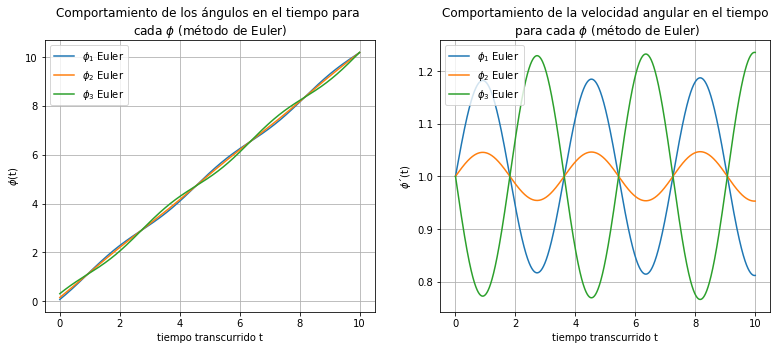

In [ ]:
## GRÁFICOS
# Gráfico de los resultados obtenidos para phi y phi' con el método de Euler
fig, axs= plt.subplots(1,2)
axs[0].set_title('Comportamiento de los ángulos en el tiempo para \ncada $\phi$ (método de Euler)')
axs[0].plot(teu,phi1e,label='$\phi_1$ Euler')
axs[0].plot(teu,phi2e,label='$\phi_2$ Euler')
axs[0].plot(teu,phi3e,label='$\phi_3$ Euler')
axs[0].set_xlabel('tiempo transcurrido t')
axs[0].set_ylabel('$\phi$(t)')
axs[0].legend()
axs[0].grid()
axs[1].set_title('Comportamiento de la velocidad angular en el tiempo\n para cada $\phi$ (método de Euler)')
axs[1].plot(teu,phi1pe,label='$\phi_1$ Euler')
axs[1].plot(teu,phi2pe,label='$\phi_2$ Euler')
axs[1].plot(teu,phi3pe,label='$\phi_3$ Euler')
axs[1].set_xlabel('tiempo transcurrido t')
axs[1].set_ylabel('$\phi´$(t)')
axs[1].legend()
axs[1].grid()
fig.set_size_inches(13,5)

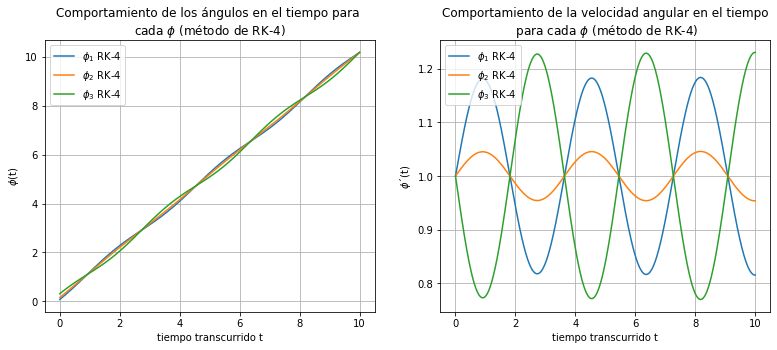

In [ ]:
# Gráfico de los resultados obtenidos para phi y phi' con el método de RK-4
fig, axs= plt.subplots(1,2)
axs[0].set_title('Comportamiento de los ángulos en el tiempo para \ncada $\phi$ (método de RK-4)')
axs[0].plot(trk,phi1r,label='$\phi_1$ RK-4')
axs[0].plot(trk,phi2r,label='$\phi_2$ RK-4')
axs[0].plot(trk,phi3r,label='$\phi_3$ RK-4')
axs[0].set_xlabel('tiempo transcurrido t')
axs[0].set_ylabel('$\phi$(t)')
axs[0].legend()
axs[0].grid()
axs[1].set_title('Comportamiento de la velocidad angular en el tiempo\n para cada $\phi$ (método de RK-4)')
axs[1].plot(trk,phi1pr,label='$\phi_1$ RK-4')
axs[1].plot(trk,phi2pr,label='$\phi_2$ RK-4')
axs[1].plot(trk,phi3pr,label='$\phi_3$ RK-4')
axs[1].set_xlabel('tiempo transcurrido t')
axs[1].set_ylabel('$\phi´$(t)')
axs[1].legend()
axs[1].grid()
fig.set_size_inches(13,5)

De los resultados gráficos obtenidos, no parece haber una diferencia notable entre el comportamiento de las funciones $\phi$ para el método de Euler y el método de Runge-Kutta de orden 4. En ambos métodos es necesario usar una cantidad de pasos (n) muy grande, si se evalúa en tiempos grandes. 

Por otro lado, considerando que el sistema está compuesto por 3 masas idénticas y resortes con fuerza k separándolas, de la gráfica a la izquierda (que describe el comportamiento de los ángulos en el tiempo) se puede decir que dos de las masas se mueven en ángulos más grandes que la otra, que describe ángulos pequeños al moverse. De la segunda gráfica (que describe la evolución de la velocidad angular en el tiempo), se afirma el comportamiento antes descrito, donde dos de las masas aumentan su velocidad angular al moverse y, probablemente, cuando se acercan a la masa cuya velocidad angular es menor, disminuyen su velocidad a un mínimo de 1 unidad por tiempo. Los resortes contraídos hacia las masas producirían una fuerza en sentido contrario (los resortes correspondientes comenzarían a estirarse) y la velocidad angular de las masas volvería a aumentar. Este ciclo se repetiría durante un tiempo indefinido (idealmente y sin rozamiento, describirían ese comportamiento periódico por siempre).

## Indicaciones finales

**Por último, debe de rellenar la siguiente encuesta de satisfacción:** https://forms.gle/4WU3ovvP7gJMj8GA7 (ingresar con el correo que se inscribió).

Enviar sus respuestas a nuestro correo: pythonclubforphysicists@gmail.com

**OJO: El correo debe de tener como asunto:**
**"Ejercicios_IIEVFC"**

*Caso contrario su solución puede quedar sin evaluar debido a la gran cantidad de correos.*


## Donaciones
<br>
<center>
Puedes donar una vez en el siguiente enlace (Ko-Fi):

<br>
    
*Click en la imagen.*

<a href="https://ko-fi.com/rcrdphysics">
<img src="https://habrastorage.org/webt/8r/ml/xf/8rmlxfpdzukegpxa62cxlfvgkqe.png" width=20% />

</center>